In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,6)

In [0]:
spark_df = spark.table("workspace.healthcare_analytics.gold_patient_risk_snapshot")
pdf = spark_df.toPandas()

pdf.head()

,patient_id,heart_rate,oxygen_level,systolic_bp,overall_severity,risk_group,last_alert_ts,snapshot_ts,source_system
0,496,91,90,90,NORMAL,STABLE,2026-01-18 22:42:37.735038,2026-01-19 05:07:17.869894,simulated_vitals
1,148,94,100,102,NORMAL,STABLE,2026-01-18 22:42:37.735038,2026-01-19 05:07:17.869894,simulated_vitals
2,463,96,87,106,CRITICAL,STABLE,2026-01-18 22:42:37.735038,2026-01-19 05:07:17.869894,simulated_vitals
3,392,82,93,104,NORMAL,STABLE,2026-01-18 22:42:37.735038,2026-01-19 05:07:17.869894,simulated_vitals
4,243,113,90,103,HIGH,CRITICAL,2026-01-18 22:42:37.735038,2026-01-19 05:07:17.869894,simulated_vitals


In [0]:
pdf.info()

pdf.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   patient_id        424 non-null    int32         
 1   heart_rate        424 non-null    int32         
 2   oxygen_level      424 non-null    int32         
 3   systolic_bp       424 non-null    int32         
 4   overall_severity  424 non-null    object        
 5   risk_group        424 non-null    object        
 6   last_alert_ts     424 non-null    datetime64[ns]
 7   snapshot_ts       424 non-null    datetime64[ns]
 8   source_system     424 non-null    object        
dtypes: datetime64[ns](2), int32(4), object(3)
memory usage: 23.3+ KB


,patient_id,heart_rate,oxygen_level,systolic_bp,last_alert_ts,snapshot_ts
count,424.000000,424.000000,424.000000,424.000000,424,424
mean,253.155660,92.464623,92.261792,134.073113,2026-01-18 22:42:37.735038464,2026-01-19 05:07:17.869894144
min,3.000000,55.000000,85.000000,90.000000,2026-01-18 22:42:37.735038,2026-01-19 05:07:17.869894
25%,129.750000,73.000000,88.000000,111.000000,2026-01-18 22:42:37.735037952,2026-01-19 05:07:17.869893888
50%,251.500000,94.000000,92.000000,135.000000,2026-01-18 22:42:37.735037952,2026-01-19 05:07:17.869893888
75%,376.250000,112.000000,96.000000,156.000000,2026-01-18 22:42:37.735037952,2026-01-19 05:07:17.869893888
max,500.000000,130.000000,100.000000,180.000000,2026-01-18 22:42:37.735038,2026-01-19 05:07:17.869894
std,143.112908,21.970831,4.551762,25.915700,NaN,NaN


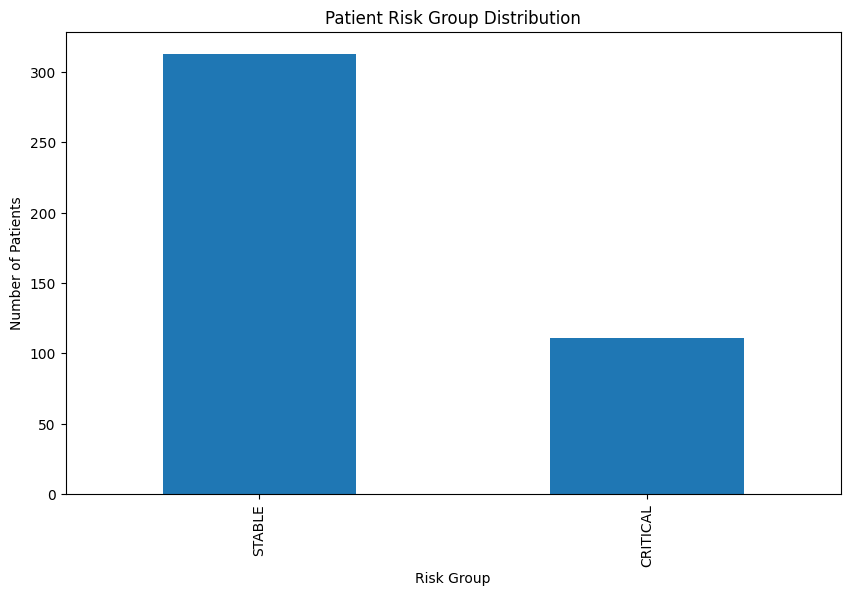

In [0]:
pdf["risk_group"].value_counts().plot(
    kind="bar",
    title="Patient Risk Group Distribution"
)
plt.xlabel("Risk Group")
plt.ylabel("Number of Patients")
plt.show()

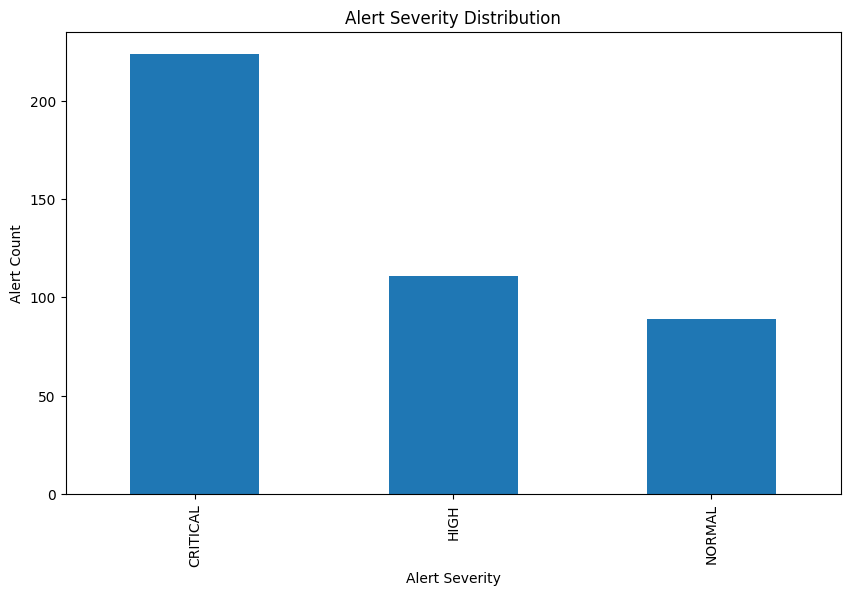

In [0]:
pdf["overall_severity"].value_counts().plot(
    kind="bar",
    title="Alert Severity Distribution"
)
plt.xlabel("Alert Severity")
plt.ylabel("Alert Count")
plt.show()

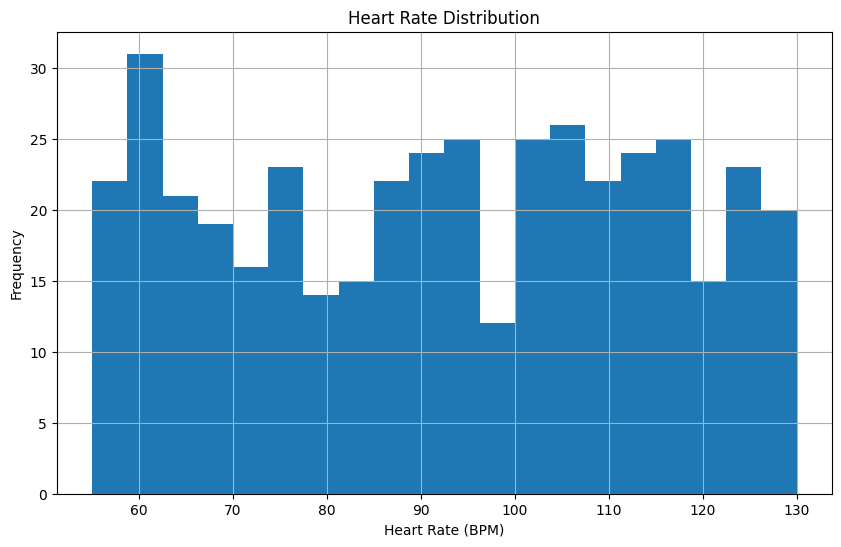

In [0]:
pdf["heart_rate"].hist(bins=20)
plt.title("Heart Rate Distribution")
plt.xlabel("Heart Rate (BPM)")
plt.ylabel("Frequency")
plt.show()

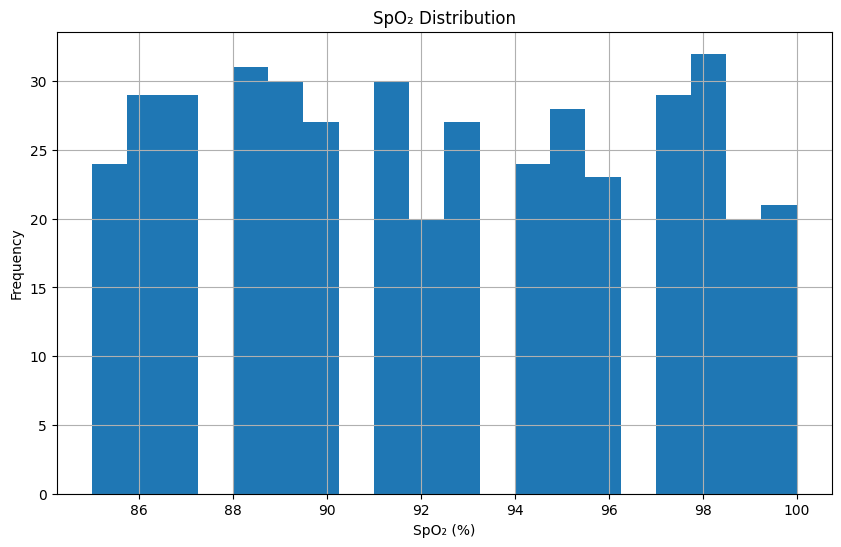

In [0]:
pdf["oxygen_level"].hist(bins=20)
plt.title("SpO₂ Distribution")
plt.xlabel("SpO₂ (%)")
plt.ylabel("Frequency")
plt.show()

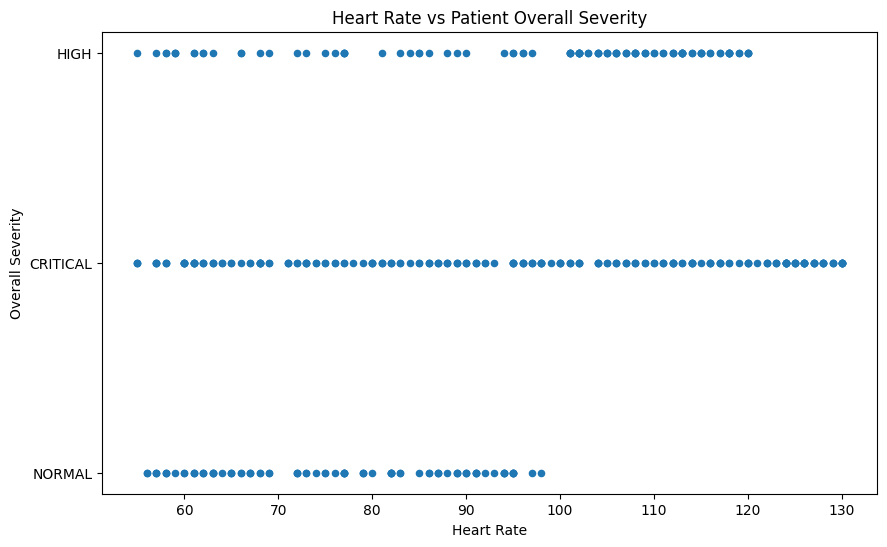

In [0]:
pdf.plot.scatter(
    x="heart_rate",
    y="overall_severity",
    title="Heart Rate vs Patient Overall Severity"
)
plt.xlabel("Heart Rate")
plt.ylabel("Overall Severity")
plt.show()

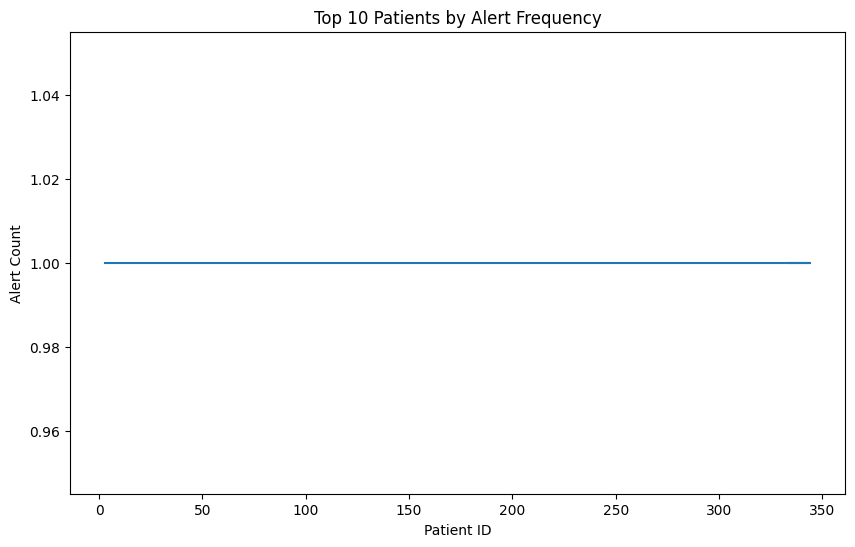

In [0]:
(pdf.groupby("patient_id")["alert_id"]
   .count()
   .sort_values(ascending=False)
   .head(10)
   .plot(kind="bar", title="Top 10 Patients by Alert Frequency"))

plt.xlabel("Patient ID")
plt.ylabel("Alert Count")
plt.show()

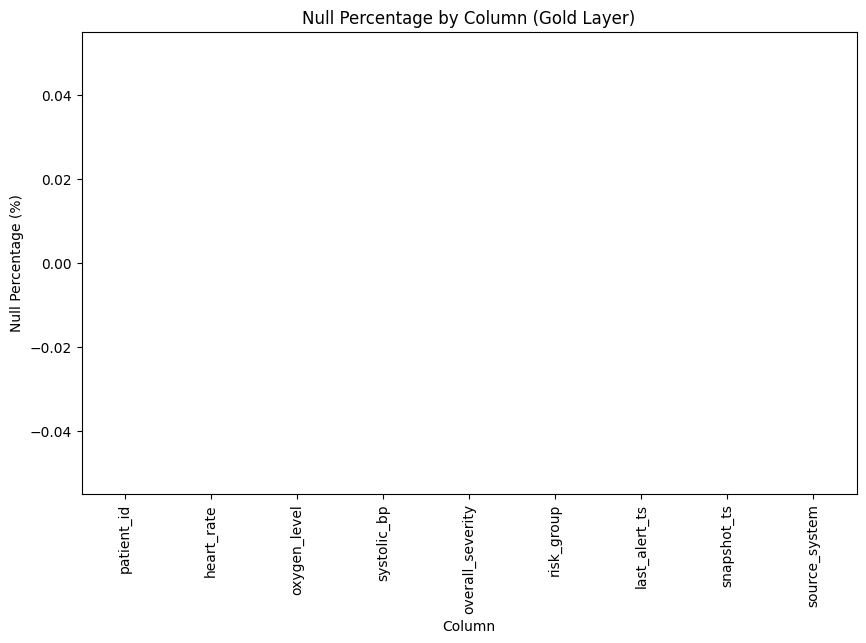

In [0]:
(pdf.isnull().mean() * 100).plot(
    kind="bar",
    title="Null Percentage by Column (Gold Layer)"
)
plt.xlabel("Column")
plt.ylabel("Null Percentage (%)")
plt.show()

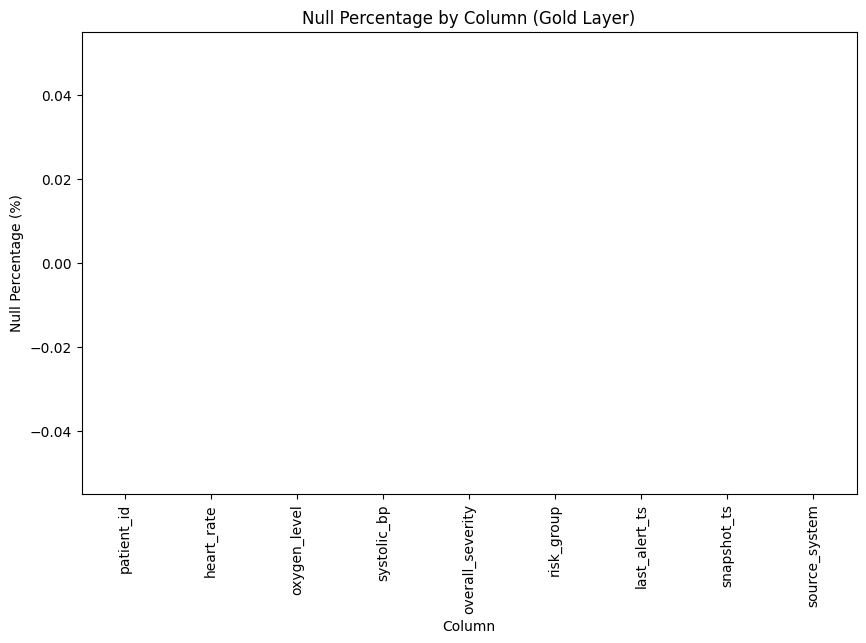

In [0]:
(pdf.isnull().mean() * 100).plot(
    kind="bar",
    title="Null Percentage by Column (Gold Layer)"
)
plt.xlabel("Column")
plt.ylabel("Null Percentage (%)")
plt.show()

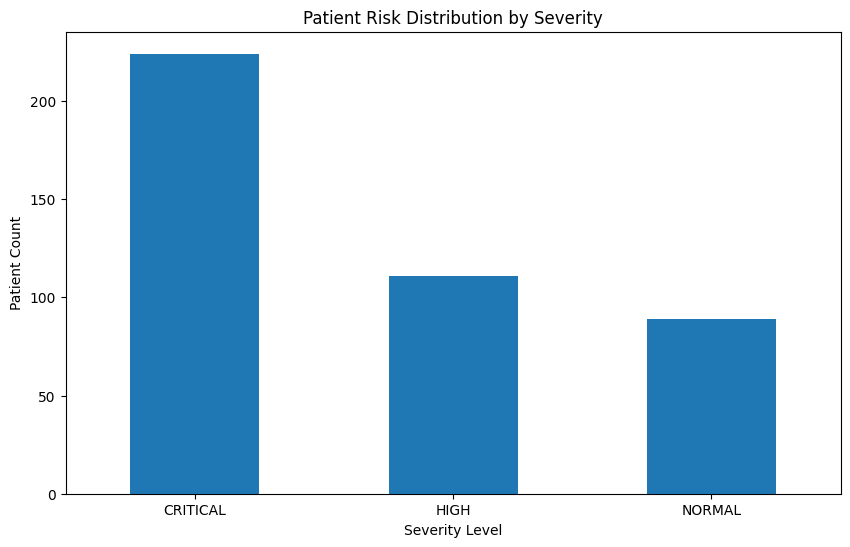

In [0]:
import matplotlib.pyplot as plt

severity_counts = pdf["overall_severity"].value_counts()

severity_counts.plot(
    kind="bar",
    title="Patient Risk Distribution by Severity",
    ylabel="Patient Count",
    xlabel="Severity Level",
    rot=0
)

plt.show()

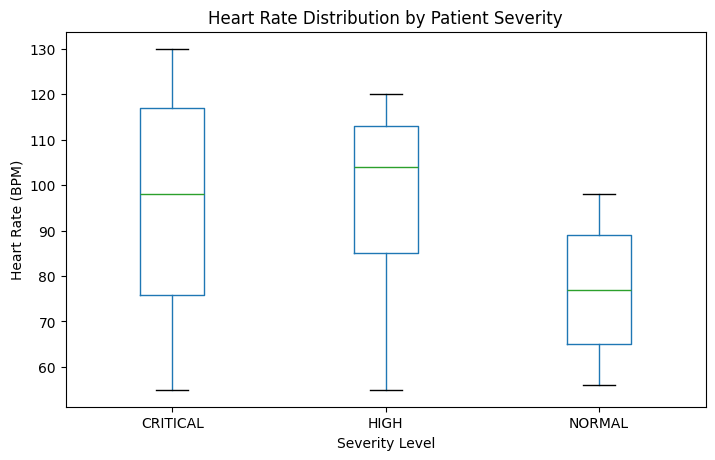

In [0]:
pdf.boxplot(
    column="heart_rate",
    by="overall_severity",
    grid=False,
    figsize=(8,5)
)

plt.title("Heart Rate Distribution by Patient Severity")
plt.suptitle("")
plt.xlabel("Severity Level")
plt.ylabel("Heart Rate (BPM)")
plt.show()

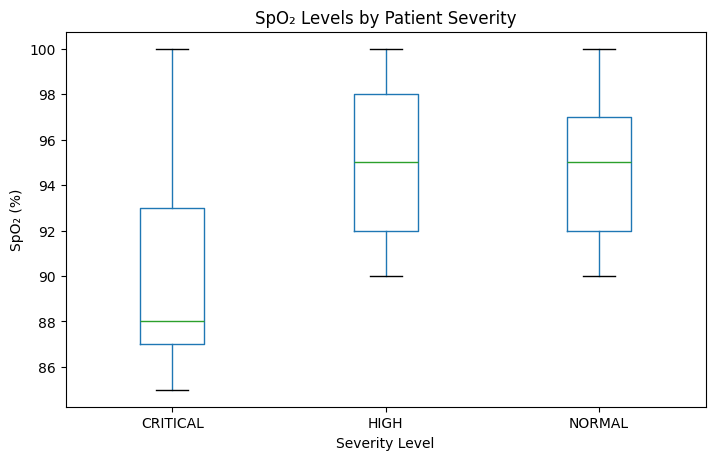

In [0]:
pdf.boxplot(
    column="oxygen_level",
    by="overall_severity",
    grid=False,
    figsize=(8,5)
)

plt.title("SpO₂ Levels by Patient Severity")
plt.suptitle("")
plt.xlabel("Severity Level")
plt.ylabel("SpO₂ (%)")
plt.show()

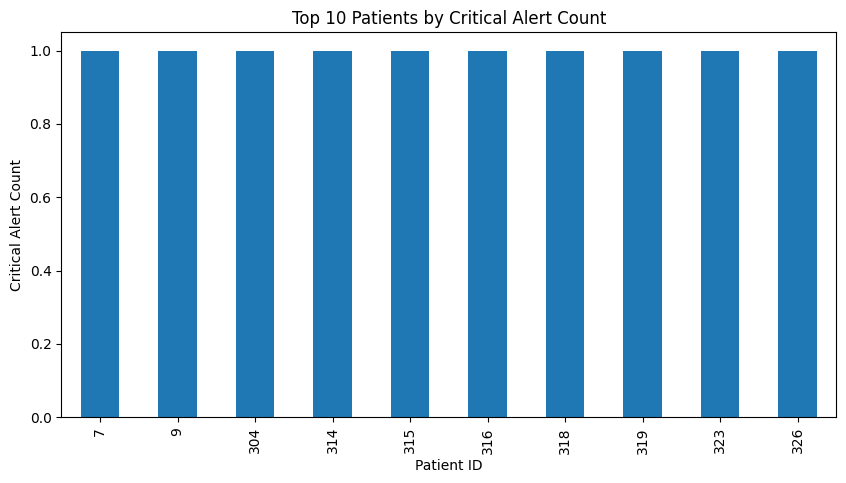

In [0]:
critical_alerts = pdf[pdf["overall_severity"] == "CRITICAL"]

(critical_alerts.groupby("patient_id")
 .size()
 .sort_values(ascending=False)
 .head(10)
 .plot(kind="bar", figsize=(10,5), title="Top 10 Patients by Critical Alert Count"))

plt.xlabel("Patient ID")
plt.ylabel("Critical Alert Count")
plt.show()

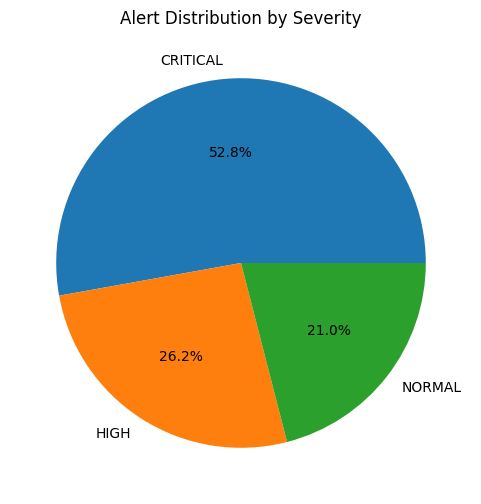

In [0]:
(pdf.groupby("overall_severity")
 .size()
 .plot(kind="pie", autopct="%1.1f%%", figsize=(6,6),
       title="Alert Distribution by Severity"))

plt.ylabel("")
plt.show()

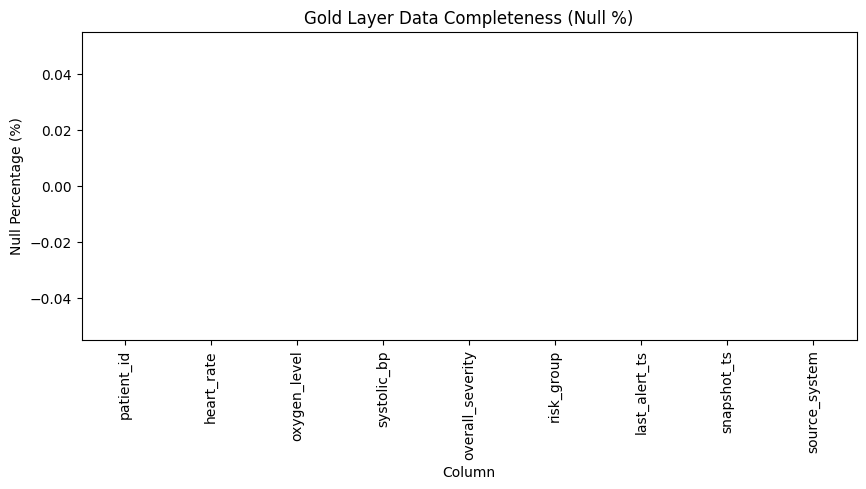

In [0]:
null_pct = (pdf.isnull().mean() * 100)

null_pct.plot(
    kind="bar",
    figsize=(10,4),
    title="Gold Layer Data Completeness (Null %)"
)

plt.ylabel("Null Percentage (%)")
plt.xlabel("Column")
plt.show()